### Binary Classification with Both Algorithms

### Goal: Predict whether a person has diabetes.

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import StandardScaler

#### 1. load the dataset

In [3]:
df = pd.read_csv(r"C:\Users\bbuser\Downloads\diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 2.Train and evaluate both models.

In [ ]:
#train and evaluate both models.
X = df.drop('Outcome', axis=1)
y = df['Outcome']
#feature and target split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# K-NN Classifier
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Accuracy: {log_reg_accuracy:.2f}')
#f1 score
from sklearn.metrics import classification_report
print("K-NN Classification Report:")
print(classification_report(y_test, knn.predict(X_test)))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
#recall score
from sklearn.metrics import recall_score
print(f'K-NN Recall: {recall_score(y_test, knn.predict(X_test)):.2f}')
print(f'Logistic Regression Recall: {recall_score(y_test, y_pred_log):.2f}')
#precision score
from sklearn.metrics import precision_score
print(f'K-NN Precision: {precision_score(y_test, knn.predict(X_test)):.2f}')
print(f'Logistic Regression Precision: {precision_score(y_test, y_pred_log):.2f}')


Logistic Regression Accuracy: 0.75
K-NN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        99
           1       0.75      0.49      0.59        55

    accuracy                           0.76       154
   macro avg       0.76      0.70      0.71       154
weighted avg       0.76      0.76      0.75       154

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

K-NN Recall: 0.49
Logistic Regression Recall: 0.67
K-NN Precision: 0.75
Logistic Regression Precision: 0.65


In [8]:
#prediction 
y_pred_knn = knn.predict(X_test)
y_pred_log = log_reg.predict(X_test)
print(f'K-NN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}')
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.2f}')

K-NN Accuracy: 0.76
Logistic Regression Accuracy: 0.75


#### 3.Compare their accuracy, precision, recall, and F1-score.

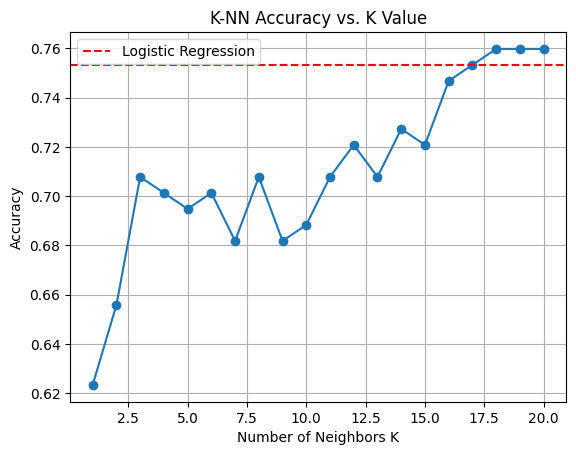

In [7]:
#compare their accuracy, precision, recall, and F1-score.
plt.plot(k_values, accuracies, marker='o')
plt.axhline(y=log_reg_accuracy, color='r', linestyle='--', label='Logistic Regression')
plt.title('K-NN Accuracy vs. K Value')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
    